# Introdução

#### Dataset: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/data

#### Este projeto tem como objetivo analisar e entender como os diversos atributos (acousticness, danceability, energy, etc) estão relacionados ao artista, ano e gênero da música.

### Entendendo os atributos

#### As definições foram retiradas de: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

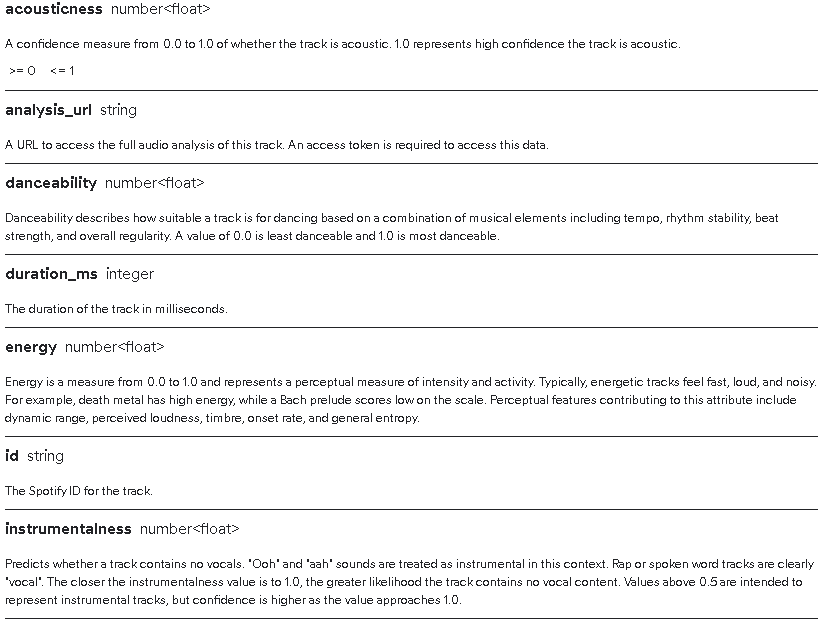
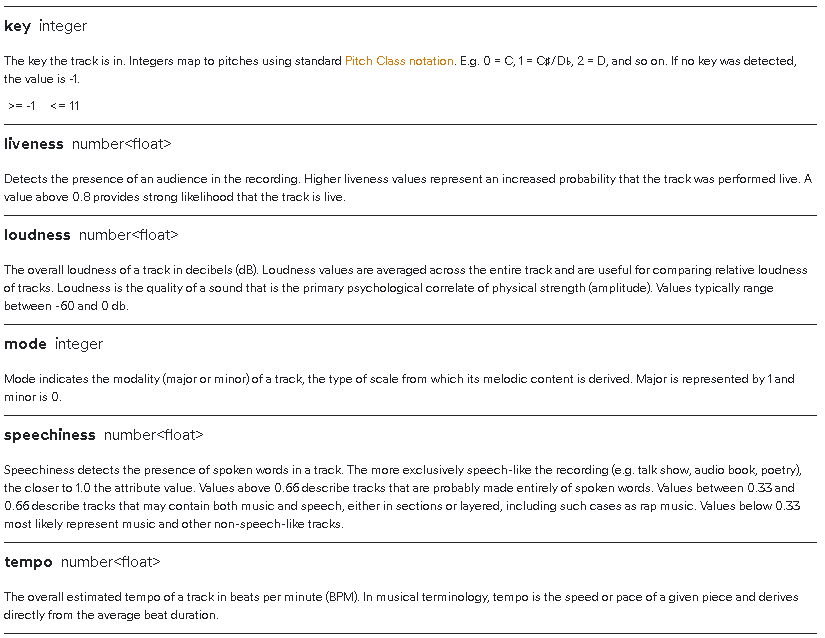
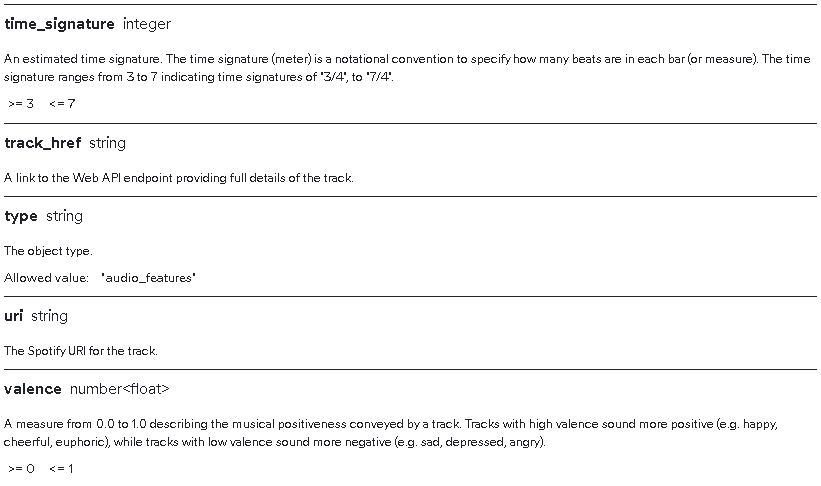

# Tratamento de dados

### Importando bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\data_w_genres.csv') 
data_genre = pd.read_csv('data\data_by_genres.csv')
data_year = pd.read_csv('data\data_by_year.csv')

In [3]:
data_genre.shape

(2973, 14)

In [4]:
data_genre.genres.value_counts()

21st century classical    1
north carolina roots      1
nordic soundtrack         1
norman ok indie           1
norsk lovsang             1
                         ..
ethio-jazz                1
ethiopian pop             1
ethnomusicology           1
ethnotronica              1
zydeco                    1
Name: genres, Length: 2973, dtype: int64

##### Através do data_genre sabemos que no banco de dados do spotify estão listados 2973 gêneros diferentes.

In [5]:
data.head(10)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
5,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.609556,0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5,1,36
6,[],"""Mama"" Helen Teagarden",0.725000,0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,2
7,[],"""Test for Victor Young""",0.927000,0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,2
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15


##### Verificamos também que precisamos modificar a coluna 'genres' de data. Quando um artista possui mais de um gênero, todos os gêneros aparecem na mesma linha no formato de uma única string. Vamos modificá-la para que cada gênero apareça em uma linha diferente. Isso facilitará a análise posteriormente.

In [6]:
generos = data.genres
generos

0                                           ['show tunes']
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
28675                                                   []
28676    ['c-pop', 'classic cantopop', 'classic mandopo...
28677                                                   []
28678              ['chinese indie', 'chinese indie rock']
28679                               ['classic korean pop']
Name: genres, Length: 28680, dtype: object

In [7]:
lista_generos_data_w_genres = [] # Lista para colocar um gênero por linha
num_generos_contidos = [] # Número de gêneros contidos em cada artista

for genero in generos:
    # Retirar todos os caracteres especiais e depois separá-los em uma lista
    genero = genero.replace('[','').replace(']','').replace('"','').replace("'","").split(',') 
    num_generos_contidos.append(len(genero))
    for gen in genero:
        gen = gen.strip()
        lista_generos_data_w_genres.append(gen)

In [8]:
generos_unicos = np.unique(lista_generos_data_w_genres)
len(generos_unicos)

2973

##### O número de gêneros únicos em 'lista_generos_data_w_genres' corresponde com o que achamos em 'data_genre' (2973).

In [9]:
# Criando uma cópia do dataframe para não modificar o original
df = data.copy() 

In [10]:
df['repetir n vezes'] = num_generos_contidos

In [11]:
# Repetir a linha n vezes, sendo n a quantidade de gêneros que um artista possui 
df  = df.loc[df.index.repeat(df['repetir n vezes'])] 

In [12]:
df.tail(20)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,repetir n vezes
28666,['taiwan campus folk'],陳蘭麗,0.502000,0.609000,152883.000000,0.83300,0.000000,0.134000,-6.261000,0.215000,154.596000,0.718000,35.000000,0,1,2,1
28667,['classic cantopop'],陳麗斯,0.562000,0.550000,195013.000000,0.37500,0.000004,0.244000,-12.277000,0.033200,75.703000,0.405000,33.000000,0,1,2,1
28668,[],霜華雪華,0.915687,0.356542,212896.854167,0.06924,0.004585,0.147537,-23.461229,0.051515,105.645438,0.338398,25.166667,0,1,96,1
28669,[],韋綺珊,0.758000,0.588000,266000.000000,0.35400,0.000006,0.144000,-14.259000,0.027000,131.790000,0.398000,42.000000,6,0,1,1
28670,[],須永ひろし,0.911000,0.673000,413800.000000,0.13500,0.574000,0.100000,-20.876000,0.036400,123.575000,0.358000,27.000000,7,0,2,1
28671,[],須田景凪,0.028100,0.559000,209636.000000,0.87300,0.000000,0.185000,-4.401000,0.054300,150.055000,0.797000,67.000000,0,0,2,1
28672,[],高慧君,0.686000,0.520000,286840.000000,0.28500,0.000000,0.093100,-10.754000,0.027000,93.922000,0.079800,53.000000,10,1,2,1
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3


In [13]:
 # Substituir os valores da coluna genre com os valores corretos
df['genres'] = lista_generos_data_w_genres

In [14]:
df.tail(20)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,repetir n vezes
28666,taiwan campus folk,陳蘭麗,0.502000,0.609000,152883.000000,0.83300,0.000000,0.134000,-6.261000,0.215000,154.596000,0.718000,35.000000,0,1,2,1
28667,classic cantopop,陳麗斯,0.562000,0.550000,195013.000000,0.37500,0.000004,0.244000,-12.277000,0.033200,75.703000,0.405000,33.000000,0,1,2,1
28668,,霜華雪華,0.915687,0.356542,212896.854167,0.06924,0.004585,0.147537,-23.461229,0.051515,105.645438,0.338398,25.166667,0,1,96,1
28669,,韋綺珊,0.758000,0.588000,266000.000000,0.35400,0.000006,0.144000,-14.259000,0.027000,131.790000,0.398000,42.000000,6,0,1,1
28670,,須永ひろし,0.911000,0.673000,413800.000000,0.13500,0.574000,0.100000,-20.876000,0.036400,123.575000,0.358000,27.000000,7,0,2,1
28671,,須田景凪,0.028100,0.559000,209636.000000,0.87300,0.000000,0.185000,-4.401000,0.054300,150.055000,0.797000,67.000000,0,0,2,1
28672,,高慧君,0.686000,0.520000,286840.000000,0.28500,0.000000,0.093100,-10.754000,0.027000,93.922000,0.079800,53.000000,10,1,2,1
28673,c-pop,鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3
28673,classic mandopop,鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3
28673,vintage chinese pop,鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3


In [15]:
df.genres.replace('', pd.NA, inplace=True)

In [16]:
df.drop('repetir n vezes', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74911 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            65054 non-null  object 
 1   artists           74911 non-null  object 
 2   acousticness      74911 non-null  float64
 3   danceability      74911 non-null  float64
 4   duration_ms       74911 non-null  float64
 5   energy            74911 non-null  float64
 6   instrumentalness  74911 non-null  float64
 7   liveness          74911 non-null  float64
 8   loudness          74911 non-null  float64
 9   speechiness       74911 non-null  float64
 10  tempo             74911 non-null  float64
 11  valence           74911 non-null  float64
 12  popularity        74911 non-null  float64
 13  key               74911 non-null  int64  
 14  mode              74911 non-null  int64  
 15  count             74911 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

##### O dataframe agora está pronto para análise!

## Análise exploratória de dados (EDA)

In [18]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,74911.000000,74911.000000,7.491100e+04,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000
mean,0.396676,0.559031,2.440243e+05,0.555646,0.149868,0.196063,-10.126274,0.087290,118.139670,0.521732,39.654475,5.475164,0.768378,22.255103
std,0.341268,0.163683,9.884551e+04,0.240067,0.268179,0.123470,5.223291,0.093640,22.360958,0.223769,18.970955,3.505637,0.421871,62.852771
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.085570,0.456000,1.925182e+05,0.380775,0.000011,0.115667,-12.547333,0.039360,104.644000,0.365000,31.000000,2.000000,1.000000,2.000000
50%,0.295667,0.564000,2.303562e+05,0.584621,0.003040,0.165980,-9.066500,0.051900,117.998333,0.531769,43.000000,6.000000,1.000000,5.000000
75%,0.712571,0.676500,2.736410e+05,0.739300,0.156186,0.235063,-6.342000,0.090533,129.973000,0.686333,53.000000,9.000000,1.000000,16.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


### Qual gênero musical possui mais artistas em atividade na plataforma?

Text(0.5, 1.0, 'Quantidade de artistas por gênero musical')

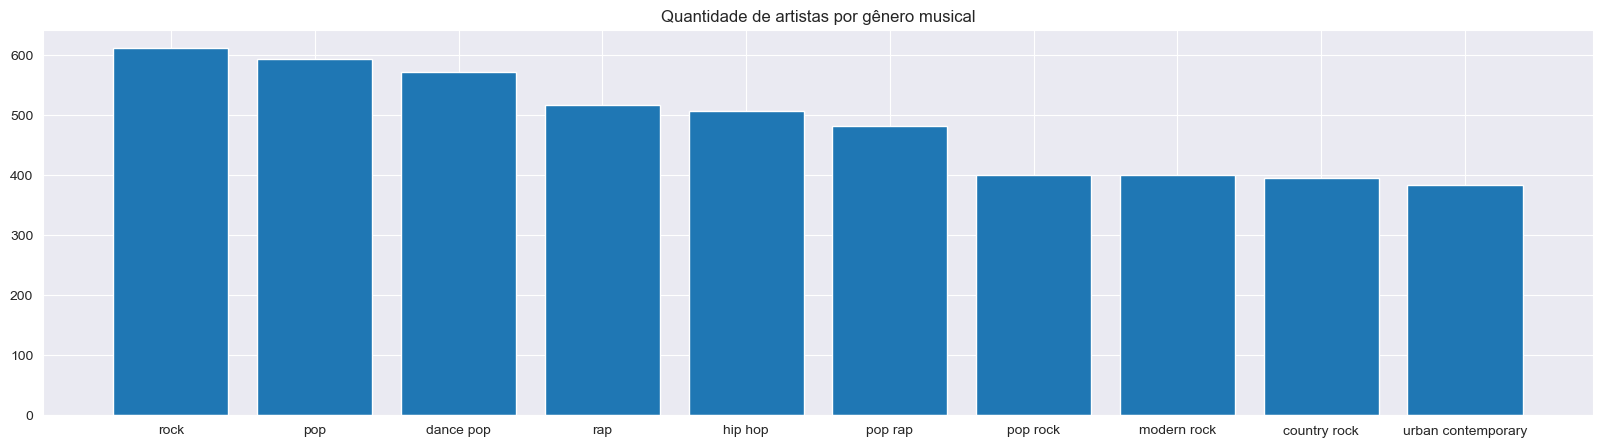

In [95]:
plt.figure(figsize=(20,5))
plt.bar(x=df.genres.value_counts()[:10].index, height=df.genres.value_counts()[:10])
plt.title('Quantidade de artistas por gênero musical')

##### Segundo o gráfico acima podemos verificar que o gênero rock possui a maior quantidade de artistas listados na plataforma do spotify, seguido por pop e dance pop. É interessante observar que no top 10, 7 são variações de rock e/ou pop.

In [20]:
top_10_gen = df.genres.value_counts()[:10].index
top_10_gen

Index(['rock', 'pop', 'dance pop', 'rap', 'hip hop', 'pop rap', 'pop rock',
       'modern rock', 'country rock', 'urban contemporary'],
      dtype='object')

In [21]:
df.columns

Index(['genres', 'artists', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')

In [22]:
df_top_10 = df[df.genres.isin(top_10_gen)]
df_top_10

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
22,dance pop,*NSYNC,0.191611,0.608743,236775.152381,0.694429,0.002703,0.202860,-6.273800,0.057138,115.615886,0.564781,45.371429,0,1,105
22,pop,*NSYNC,0.191611,0.608743,236775.152381,0.694429,0.002703,0.202860,-6.273800,0.057138,115.615886,0.564781,45.371429,0,1,105
24,modern rock,...And You Will Know Us by the Trail of Dead,0.008410,0.255000,273624.000000,0.858000,0.000355,0.513000,-5.085000,0.069400,144.653000,0.237000,36.000000,7,1,2
30,pop rock,"10,000 Maniacs",0.190833,0.584476,236012.619048,0.542076,0.008760,0.229705,-13.288048,0.037852,118.476095,0.573810,37.000000,9,1,42
33,rock,10cc,0.230821,0.560632,298796.578947,0.567316,0.007471,0.152095,-10.354053,0.066111,121.800263,0.555000,41.578947,7,1,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28283,pop rap,tobi lou,0.428500,0.811250,230759.250000,0.550500,0.000008,0.138500,-9.303250,0.144875,131.743250,0.626500,66.750000,5,1,8
28292,dance pop,will.i.am,0.099131,0.788405,234544.837838,0.731324,0.000023,0.166865,-6.332027,0.120111,119.170514,0.655378,54.027027,1,0,37
28292,pop,will.i.am,0.099131,0.788405,234544.837838,0.731324,0.000023,0.166865,-6.332027,0.120111,119.170514,0.655378,54.027027,1,0,37
28292,pop rap,will.i.am,0.099131,0.788405,234544.837838,0.731324,0.000023,0.166865,-6.332027,0.120111,119.170514,0.655378,54.027027,1,0,37


### O que caracteriza um gênero musical?

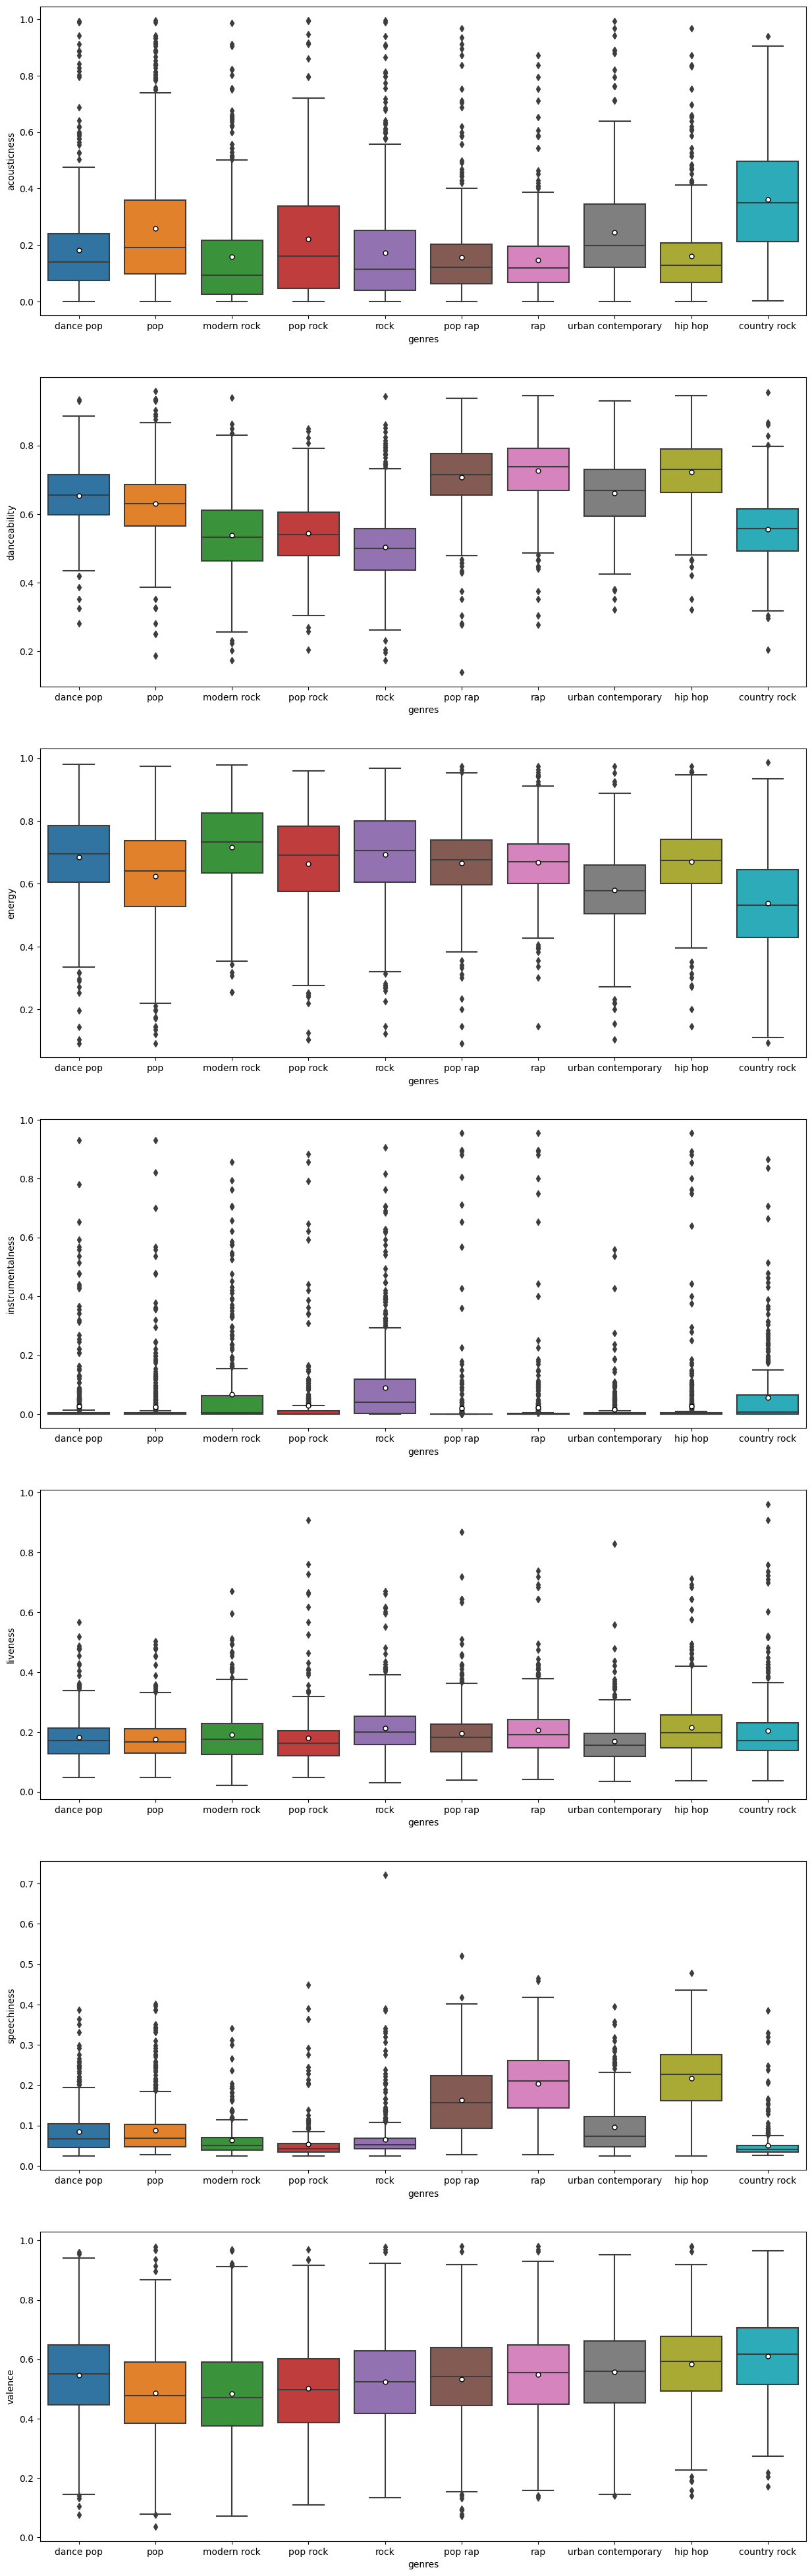

In [23]:
plt.figure(figsize=(15,50))

i = 1
atributos = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
for atr in atributos:
    plt.subplot(7,1,i)
    sns.boxplot(df_top_10, x='genres', y=atr, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", 
    "markeredgecolor":"black","markersize":"5"})
    i+=1

##### Para os 10 gêneros com mais artistas na plataforma, o gráfico de boxplot permitiu algumas observações curiosas. Country rock foi o gênero que apresentou uma mediana com 'acousticness' maior, porém não relevante o suficiente para afirmar que grande parte dos artistas criam músicas acústicas. Rap e hip hop foram os gêneros que mais apresentaram artistas em que suas músicas são apropriadas para dançar ('danceability' > 0.7). 'Valence' é uma medida interessante que representa o grau de positividade de uma música, quanto maior o 'valence', mais alegre, eufórica a música de um atista tende a ser. Em geral, todos os gêneros apresentaram um 'valence' médio em torno de 0.5.

In [24]:
atributos = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
atributos_genero = {}

for gen in top_10_gen:
    atr_valores = []
    for atr in atributos:
        atr_valores.append(df[df.genres == gen][atr].median().round(4))
    atributos_genero[gen] = atr_valores
atributos_genero

{'rock': [0.1149, 0.4999, 0.7049, 0.0414, 0.1999, 0.0514, 0.523],
 'pop': [0.1915, 0.6311, 0.6417, 0.0001, 0.166, 0.0688, 0.4775],
 'dance pop': [0.1404, 0.6555, 0.6952, 0.0002, 0.1717, 0.0668, 0.55],
 'rap': [0.118, 0.7383, 0.6692, 0.0001, 0.1901, 0.2098, 0.5548],
 'hip hop': [0.1284, 0.7301, 0.674, 0.0001, 0.1976, 0.2263, 0.5928],
 'pop rap': [0.1204, 0.7144, 0.6764, 0.0, 0.1818, 0.1566, 0.5423],
 'pop rock': [0.1603, 0.5406, 0.691, 0.0007, 0.161, 0.042, 0.4976],
 'modern rock': [0.0933, 0.5331, 0.7324, 0.0049, 0.1747, 0.0504, 0.4713],
 'country rock': [0.3485, 0.5573, 0.532, 0.0078, 0.172, 0.04, 0.616],
 'urban contemporary': [0.1972, 0.6687, 0.5775, 0.0001, 0.156, 0.073, 0.5592]}

##### É importante observar que conseguimos o valor de cada atributo calculando-se a sua mediana e não sua média. A escolha da mediana se deu por ser uma métrica mais robusta, não sendo muito influenciada por valores de outliers.

In [25]:
resumo = pd.DataFrame(atributos_genero, index=atributos)

<AxesSubplot: xlabel='Mediana dos valores'>

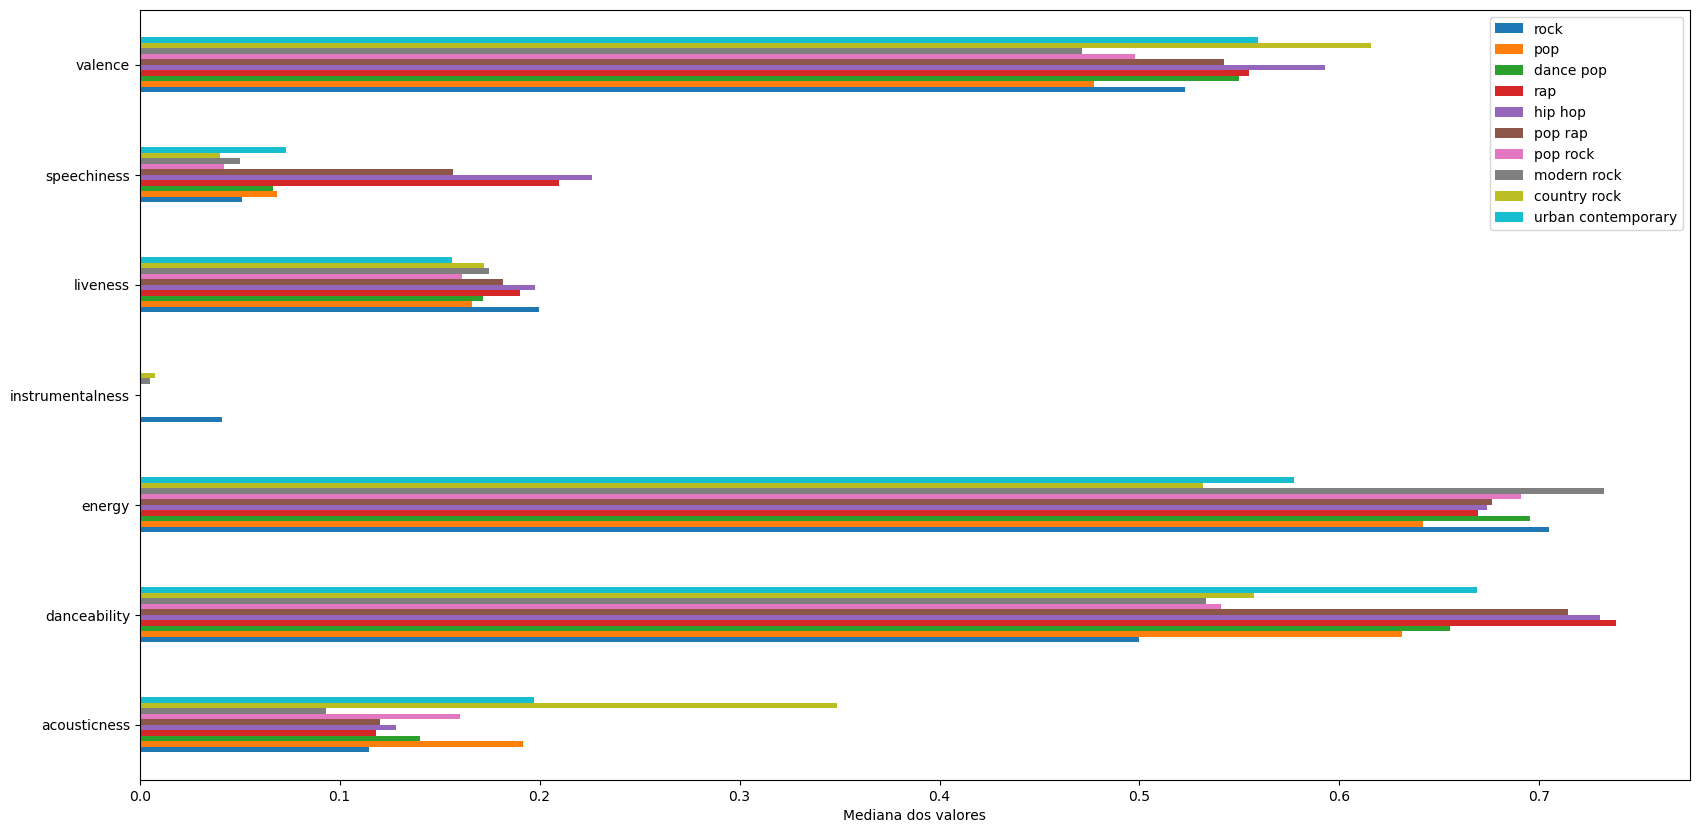

In [26]:
resumo.plot(kind = 'barh', figsize=(20,10), xlabel= 'Mediana dos valores')

In [27]:
resumo

,rock,pop,dance pop,rap,hip hop,pop rap,pop rock,modern rock,country rock,urban contemporary
acousticness,0.1149,0.1915,0.1404,0.1180,0.1284,0.1204,0.1603,0.0933,0.3485,0.1972
danceability,0.4999,0.6311,0.6555,0.7383,0.7301,0.7144,0.5406,0.5331,0.5573,0.6687
energy,0.7049,0.6417,0.6952,0.6692,0.6740,0.6764,0.6910,0.7324,0.5320,0.5775
instrumentalness,0.0414,0.0001,0.0002,0.0001,0.0001,0.0000,0.0007,0.0049,0.0078,0.0001
liveness,0.1999,0.1660,0.1717,0.1901,0.1976,0.1818,0.1610,0.1747,0.1720,0.1560
speechiness,0.0514,0.0688,0.0668,0.2098,0.2263,0.1566,0.0420,0.0504,0.0400,0.0730
valence,0.5230,0.4775,0.5500,0.5548,0.5928,0.5423,0.4976,0.4713,0.6160,0.5592


##### Por analisarmos apenas 10 gêneros dos mais de 2000 listados pelo spotify e baseado apenas em suas medianas, apesar das diversas observações, não é possível afirmar com exatidão que determinado valor do atributo caracteriza determinado gênero. 

In [28]:
data_musicas = pd.read_csv('data\data.csv')

In [29]:
data_musicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

### Houve mudança nas features com o passar das décadas?

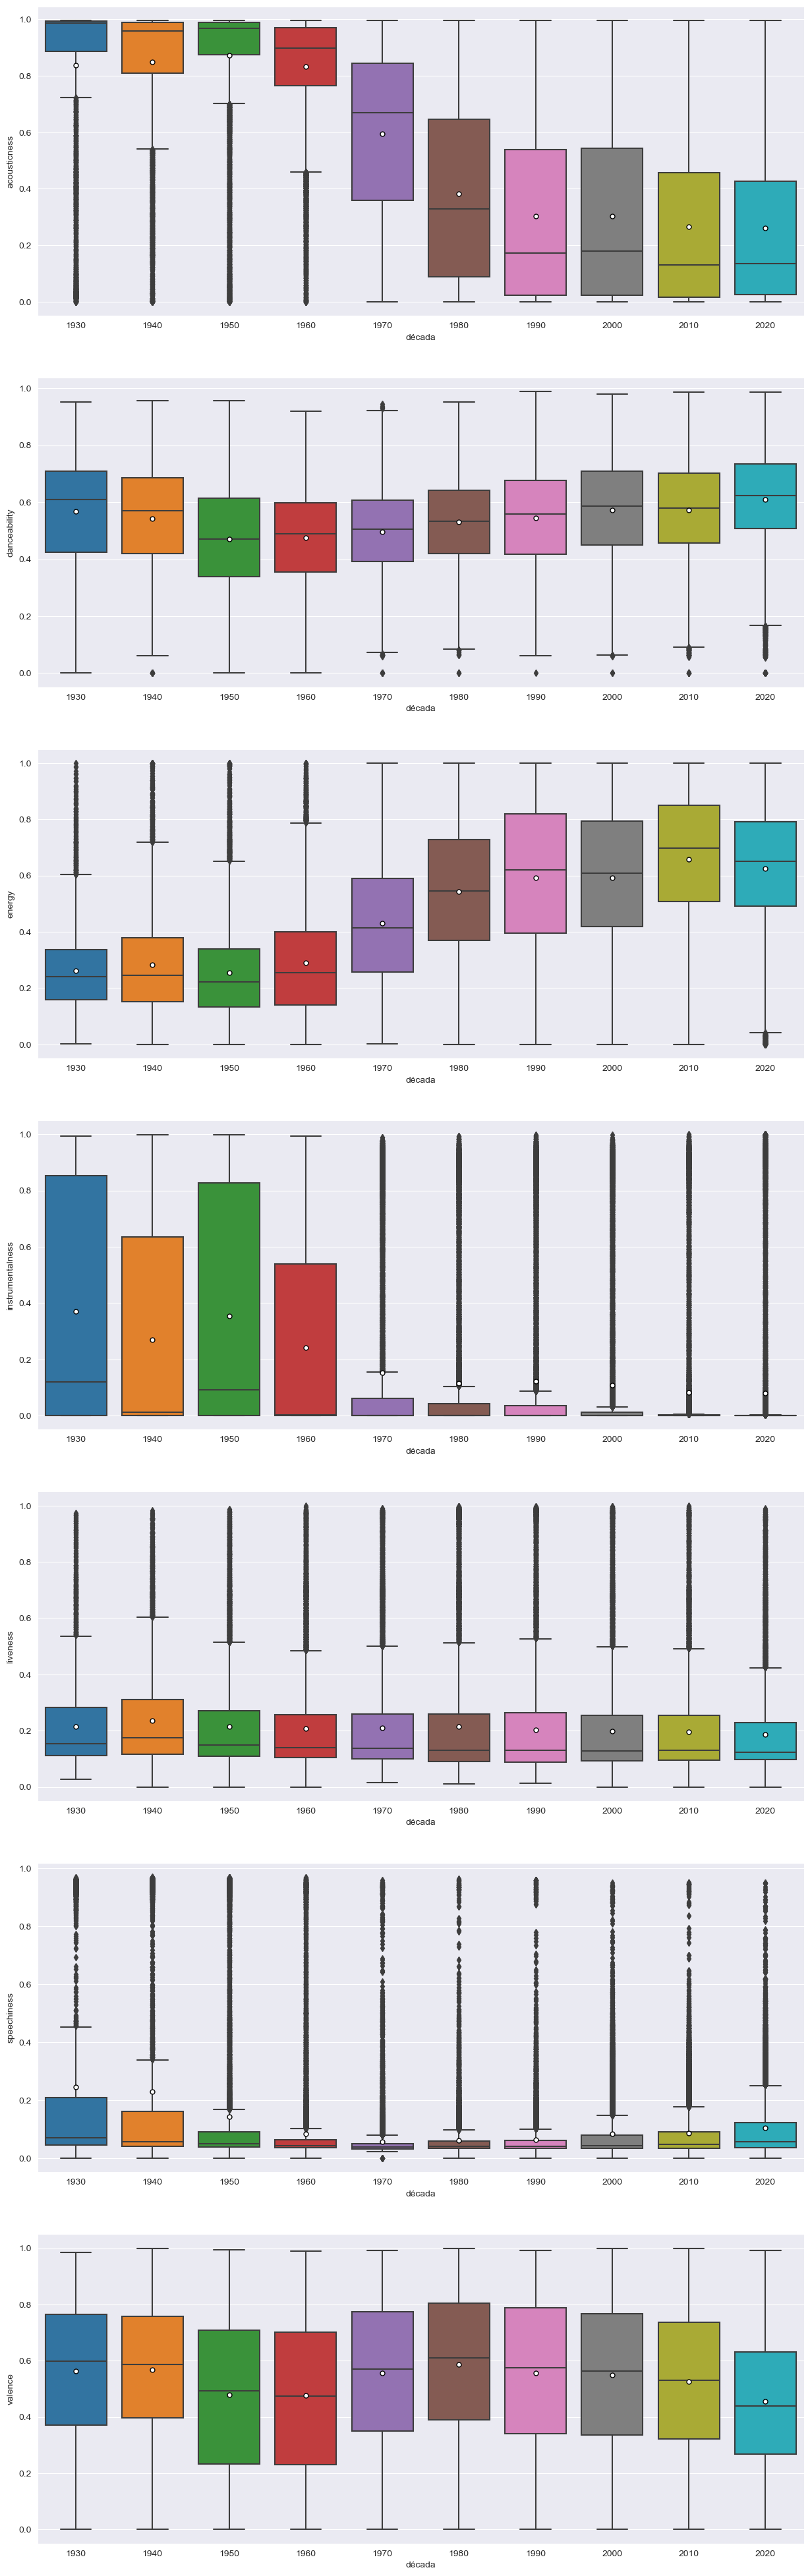

In [100]:
# Análise de cada atributo no decorrer das décadas
plt.figure(figsize=(15,50))

i = 1
atributos = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
for atr in atributos:
    plt.subplot(7,1,i)
    sns.boxplot(data_musicas, x='década', y=atr, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", 
    "markeredgecolor":"black","markersize":"5"})
    i += 1

##### Alguns pontos observados: a produção de músicas acústicas têm diminuido ao longo do tempo, ao passo que músicas mais 'energéticas' têm ganhado destaque atualmente. Percebe-se também que apesar de uma música ser energética, ela não necessariamente é positiva (tem um 'valence' alto). Entende-se por 'energético' músicas mais rápidas, altas e 'barulhentas', um bom exemplo é músicas de death metal.

### Qual década possui mais músicas populares?

In [96]:
# Criando rótulos de décadas
year_labels = ['1930','1940','1950','1960','1970','1980','1990','2000','2010','2020']
data_musicas['década'] = pd.cut(data_musicas.year,10, labels=year_labels)

data_musicas

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,década,popularidade > 70
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1930,0
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1930,0
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1930,0
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1930,0
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,...,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,2020,1
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,...,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,2020,0
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,...,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,2020,1
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,...,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,2020,0


[Text(0.5, 1.0, 'Quantidade de música lançada ao longo das décadas')]

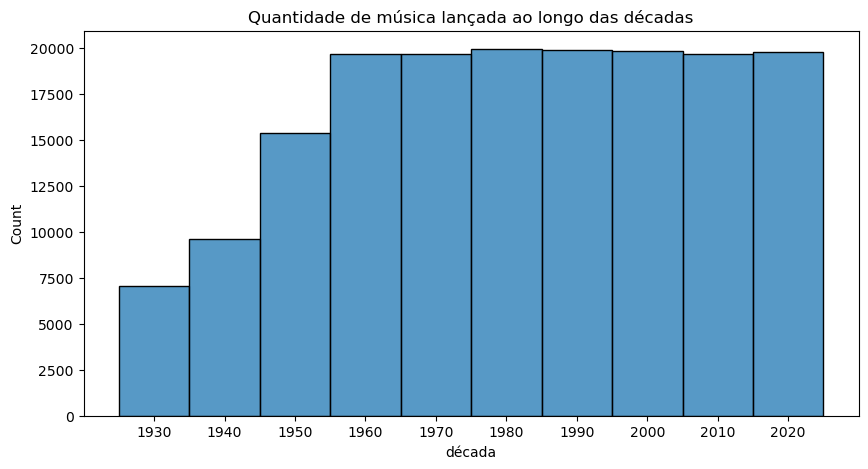

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data_musicas.década, bins=50).set(title='Quantidade de música lançada ao longo das décadas')


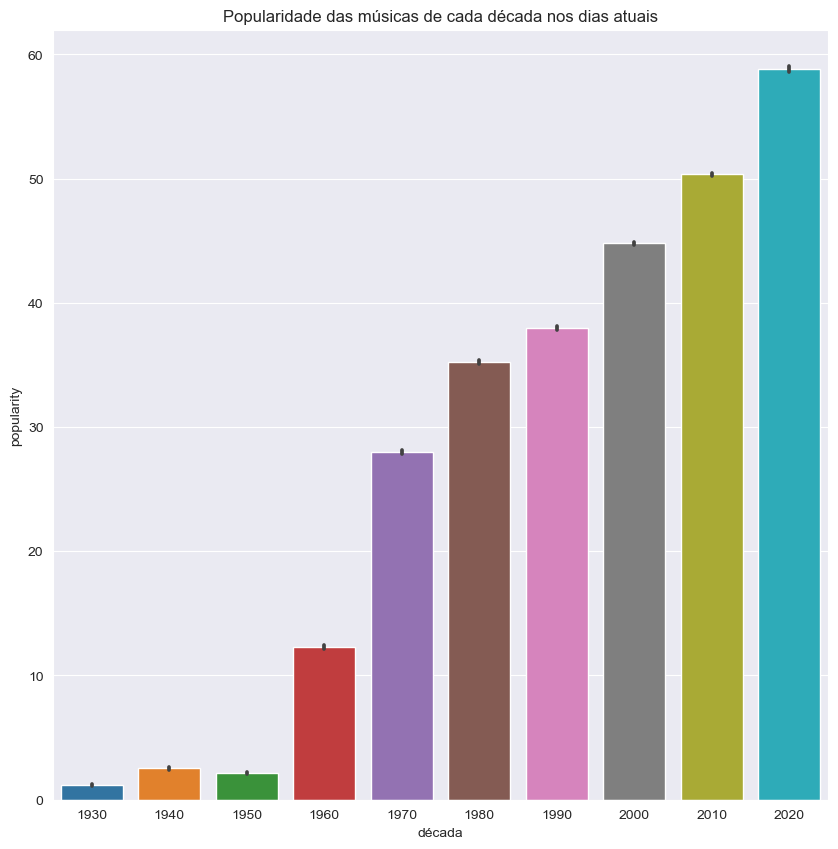

In [93]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
fig = sns.barplot(data_musicas, x='década', y='popularity', orient='v').set(title='Popularidade das músicas de cada década nos dias atuais')


##### A partir do gráfico acima podemos inferir que músicas mais atuais são mais populares entre usuários da plataforma? Ou talvez a quantidade de músicas não avaliadas no quesito popularidade (popularity = 0) pode estar influenciando o resultado? Para verificar vamos retirar todas as músicas com popularity = 0 e refazer o gráfico.

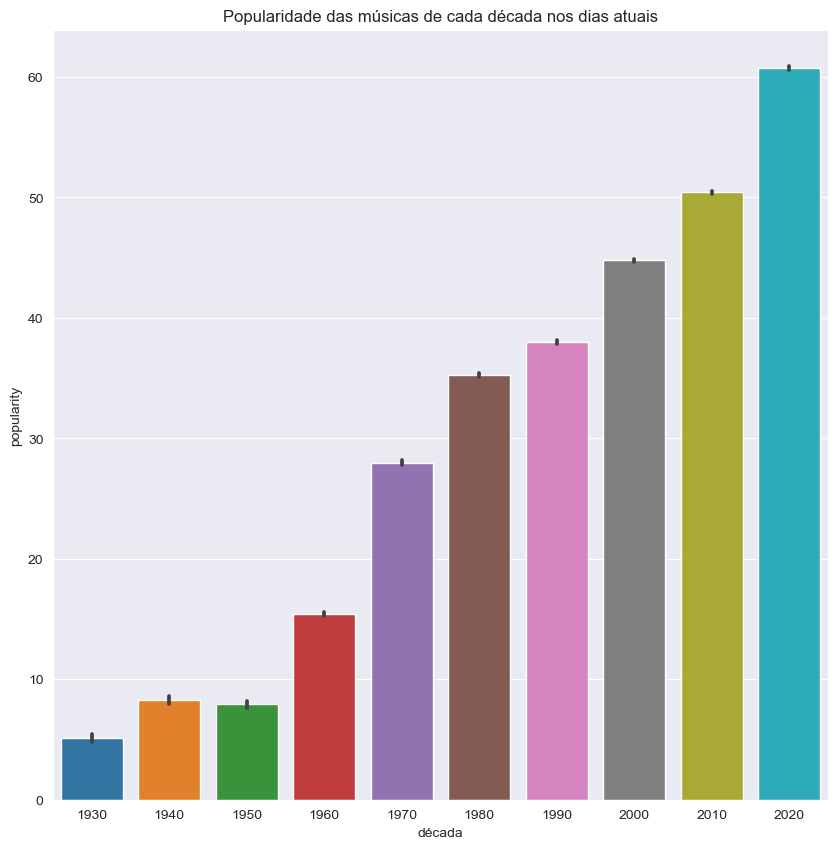

In [94]:
data_musicas_sem_0_pop = data_musicas[data_musicas.popularity != 0]
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
fig = sns.barplot(data_musicas_sem_0_pop, x='década', y='popularity', orient='v').set(title='Popularidade das músicas de cada década nos dias atuais')

##### Houve um aumento das médias durante as décadas de 1930 à 1960, porém esse aumento não interferiu nos resultados do gráfico anterior. Concluindo assim que, músicas mais atuais são mais populares na plataforma.

### Conteúdo explícito gera mais popularidade?

<AxesSubplot: xlabel='década', ylabel='Count'>

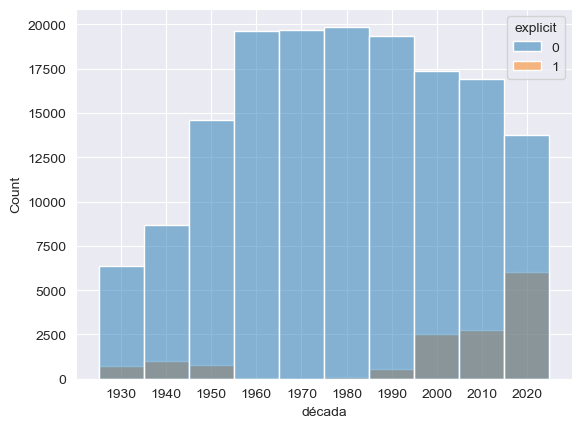

In [107]:
sns.histplot(data_musicas, x='década', bins= 50, hue='explicit')

##### A partir de 1990 percebe-se um aumento de músicas com conteúdo explícito, mas será que músicas com conteúdo explícito são mais populares? 

Text(0.5, 1.0, '')

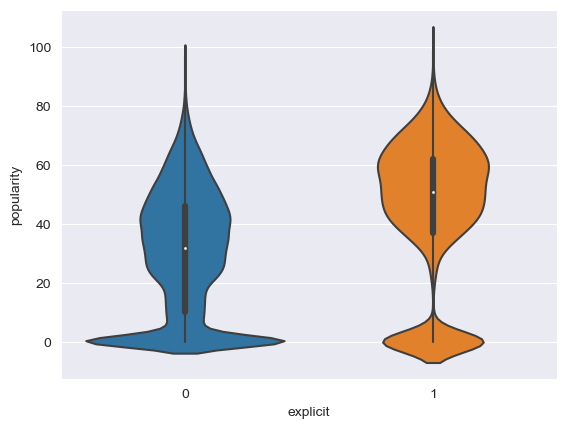

In [109]:
musicas_anos_2000 = data_musicas[data_musicas.year > 2000]
sns.violinplot(data_musicas, x='explicit', y='popularity')
plt.title('')

##### Ao analisar músicas que foram criadas a partir de 2000 percebe-se uma leve tendência de músicas com conteúdo explícito se popularizarem mais. Isso pode ser devido à ascensão do rap e hip hop como gêneros musicais mais produzidos, gêneros amplamente conhecidos pela maior liberdade de expressão e uso de termos explícitos.

### Há correlação entre o quão acústico uma música é e sua popularidade?

<AxesSubplot: xlabel='acousticness', ylabel='popularity'>

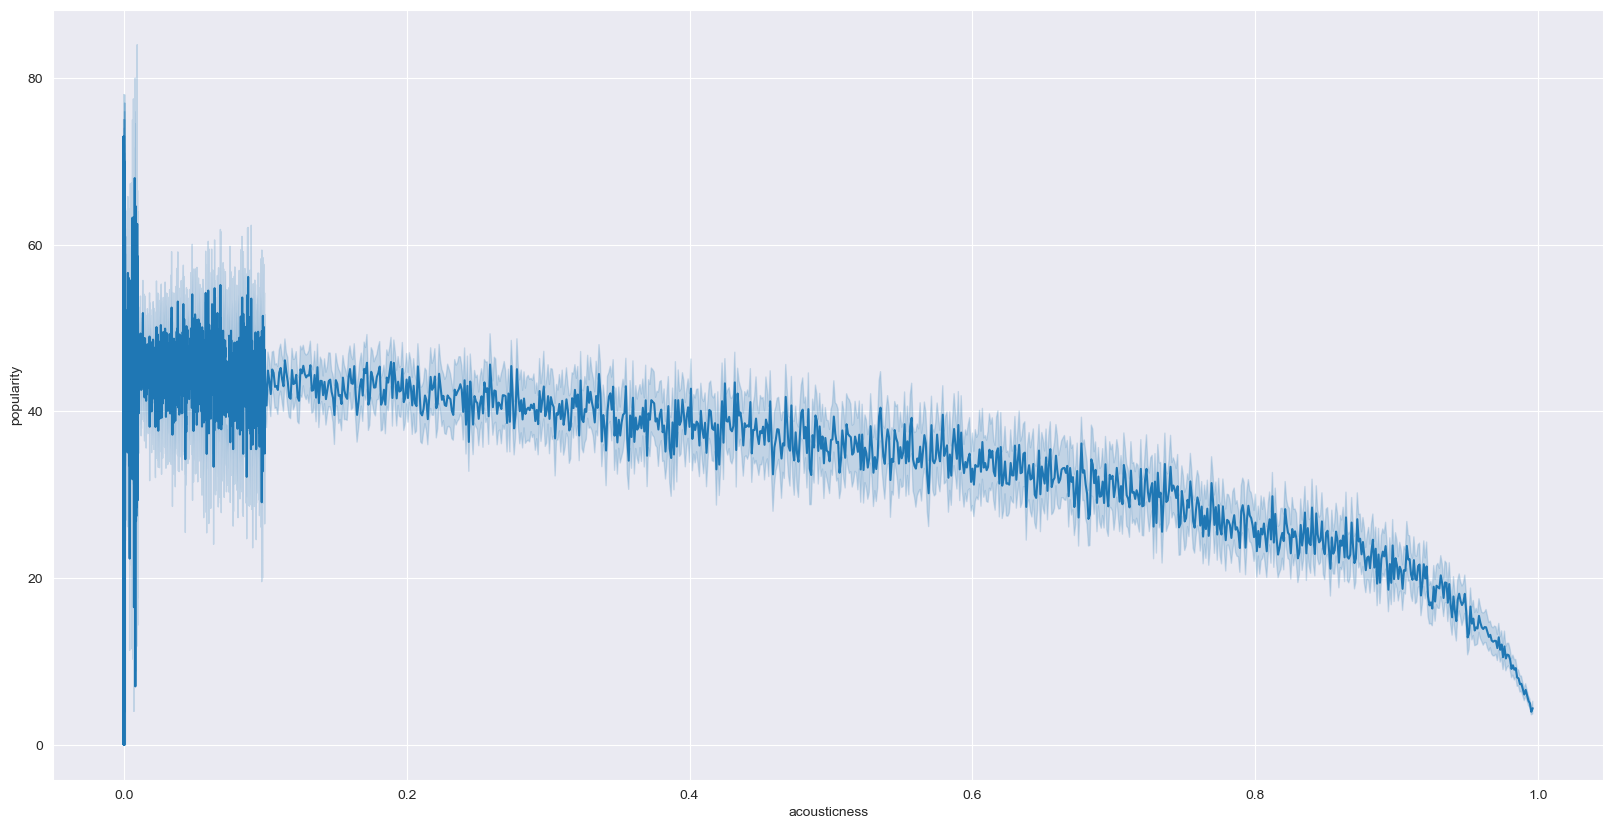

In [143]:
plt.figure(figsize=(20,10))
sns.lineplot(data_musicas, x='acousticness', y='popularity')

##### É interessante notar que a partir do gráifco, músicas que se apresentam sendo acústicas parecem ter uma popularidade menor. Porém tais variáveis podem não estar correlacionadas. Verificamos através dos gráficos anteriores que a popularidade é maior quanto mais atual a música e que a tendência a produzir músicas acústicas tem diminuído com o decorrer do tempo. Isso não quer dizer que músicas acústicas são menos populares, mas sim que a produção tem diminuido.

##### Para verificar a popularidade em relação à 'acousticness', pegaremos dados separados por décadas, a fim de minimizar a influência do tempo na análise.

<AxesSubplot: xlabel='acousticness', ylabel='popularity'>

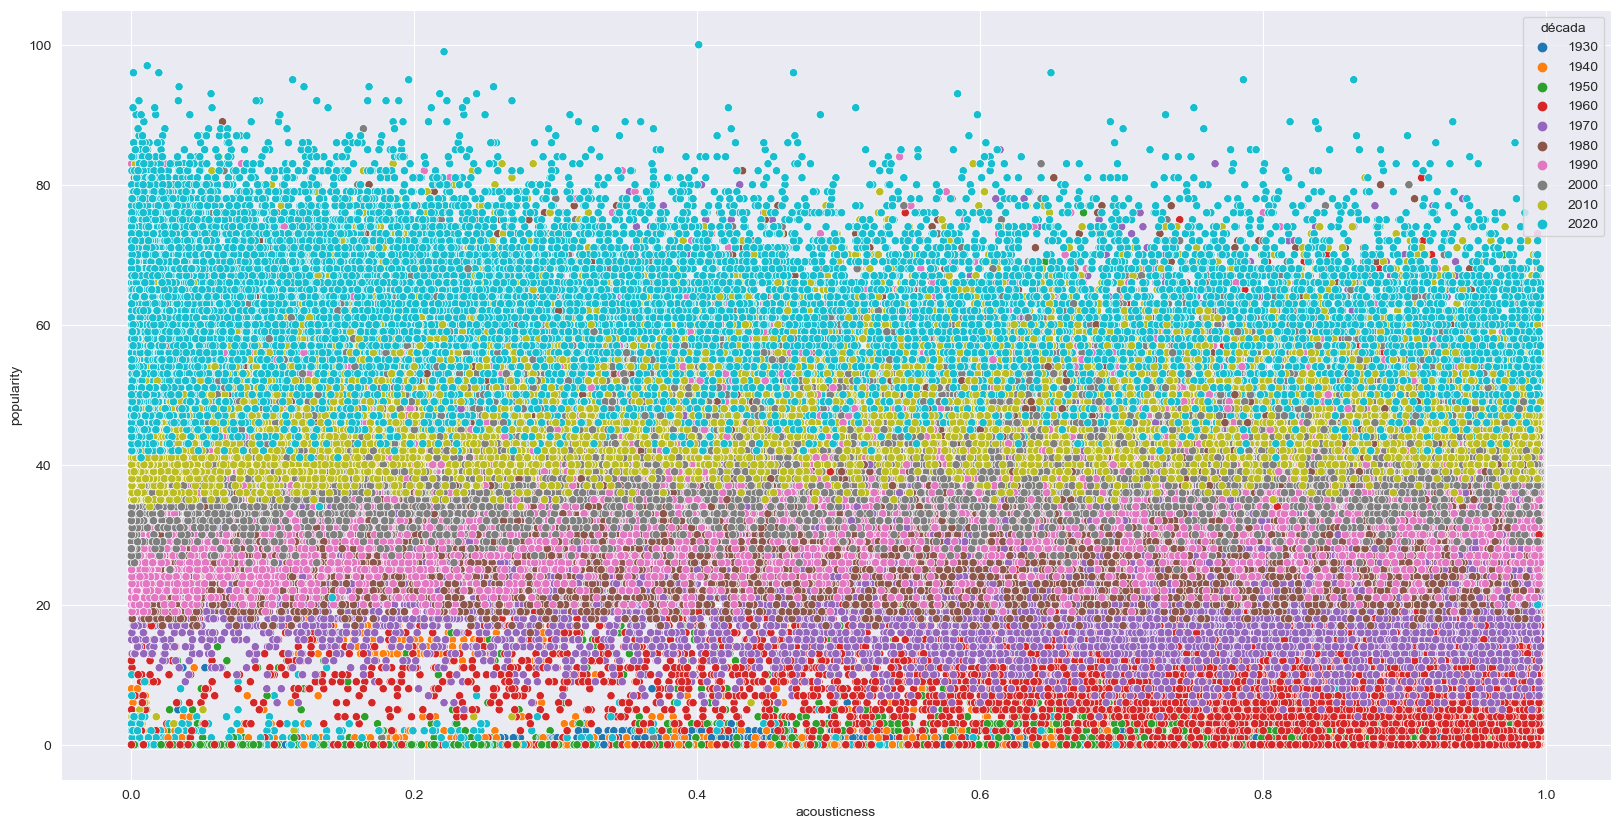

In [145]:
plt.figure(figsize=(20,10))
sns.scatterplot(data_musicas, x='acousticness', y='popularity', hue='década')

##### Confirmamos que o ano em que a música foi lançada exerce forte influência na popularidade, porém o grau de 'acousticness' não parece ter uma forte relação com o grau de popularidade de uma música.

In [36]:
data_musicas.corr()

C:\Users\danil\AppData\Local\Temp\ipykernel_29416\2846931595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_musicas.corr()


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


# Machine Learning

##### Segundo o spotify, a popularidade de uma música é um valor entre 0 e 100, sendo 100 a mais popular e é calculada por um algoritmo baseado, na maioria das vezes, pelo número total de reproduções e quão recente essas reproduções foram. Isso faz com que sons que estão tocando muito agora tenham uma popularidade maior do que sons que foram mais tocados só que no passado. Mas qual a razão de um som ser tocado mais vezes do que outro? Será que músicas que dão vontade de dançar são mais tocadas? Ou músicas que possuem uma batida mais acelerada?

##### O objetivo deste modelo é, dado os atributos numéricos, tentar estimar se a música será popular ou não.

##### Observações: 
- ##### Consideraremos uma música como sendo popular aquela em que 'popularity' for superior a 70.
- ##### **Como o ano não é uma feature de controle do usuário, iremos criar dois modelos, um com os dados de todas as décadas e outra com os dados apenas da última década e iremos analisar o viés de ambos modelos.**

- ##### **Consideraremos que linhas com popularity igual a zero, são músicas que ainda não foram avaliadas e portanto não entrarão no banco de dados de treino (?)**

### Pré processamento


Antes de criar um modelo de machine learning, é necessário verificar se é possível implementar o código com os dados existentes. A ausência de dados ou dados fora do padrão podem influenciar negativamente na geração do valor alvo. Para que isso seja evitado, alguns passos serão realizados:

- Conversão de variáveis categóricas - modelos de ml não entendem palavras, precisamos converter em dígitos 
- Separação em dados treino/teste - essencial para não causar data leakage
- Verificação de valores missing - modelo não roda caso tenha valores None
- Tratamento de Outliers
- Balanceamento da variável dependente - classes muito desbalanceadas do target pode causar viés para o lado da classe majoritária
- Conversão de escala


In [153]:
data_musicas[data_musicas['popularidade > 70'] == 1].shape[0]/data_musicas.shape[0]

0.024992235706374925

<AxesSubplot: xlabel='popularity'>

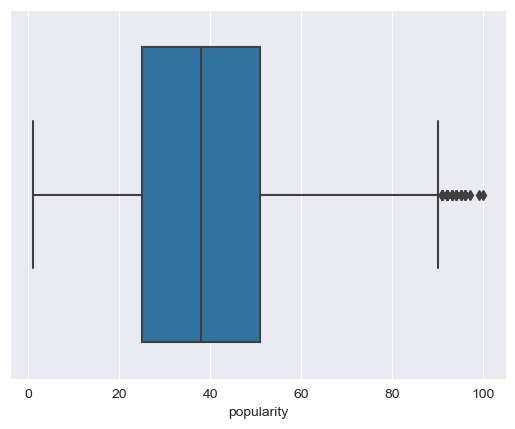

In [140]:
sns.boxplot(data_musicas_sem_0_pop, x = 'popularity')

In [141]:
data_musicas_sem_0_pop['popularidade > 70'] = [1 if x > 70 else 0 for x in data_musicas_sem_0_pop.popularity]
data_musicas_sem_0_pop['popularidade > 70'].value_counts()

C:\Users\danil\AppData\Local\Temp\ipykernel_29416\707409367.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    138496
1      4265
Name: popularidade > 70, dtype: int64

In [51]:
data_musicas.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'década', 'popularidade > 70'],
      dtype='object')

#### As features escolhids como variáveis independentes serão: acousticness, valence, danceability, duration_ms, energy, explicit, liveness, loudness, instrumentalness, speechiness e tempo.

In [52]:
features = ['acousticness', 'valence', 'danceability', 'duration_ms', 'energy', 'explicit', 'liveness', 'loudness', 'instrumentalness', 'speechiness', 'tempo']

X = data_musicas[features]
y = data_musicas['popularidade > 70']

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      170653 non-null  float64
 1   valence           170653 non-null  float64
 2   danceability      170653 non-null  float64
 3   duration_ms       170653 non-null  int64  
 4   energy            170653 non-null  float64
 5   explicit          170653 non-null  int64  
 6   liveness          170653 non-null  float64
 7   loudness          170653 non-null  float64
 8   instrumentalness  170653 non-null  float64
 9   speechiness       170653 non-null  float64
 10  tempo             170653 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 14.3 MB
